<a href="https://colab.research.google.com/github/lauragoon/Face-Mask-Detector/blob/main/cnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Model
from keras import optimizers

In [3]:
def get_data(batch_size, directory):
  
  datagen = image.ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
  dta = datagen.flow_from_directory(directory, class_mode='binary', batch_size=batch_size)

  return dta

In [15]:
## generate data
train_path = 'drive/Shared drives/DSCI 303 Final Project/ImageDataset2/training'
val_path = 'drive/Shared drives/DSCI 303 Final Project/ImageDataset2/validation'

train_data = get_data(30, train_path)
val_data = get_data(20, val_path)

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(256,256,3))
output = resnet.layers[-1].output
output = keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)

##transfer learning with fine tuning
num_epochs = 80
steps_epoch = 50
steps_val = 50

resnet.trainable = True
set_trainable = False
for layer in resnet.layers:
    if layer.name in ['res5c_branch2b', 'res5c_branch2c', 'activation_97']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential()
model.add(resnet)
model.add(Dense(256, activation='relu', input_dim=(256,256,3)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])
# model.summary()

history = model.fit(train_data, steps_per_epoch=steps_epoch, epochs=num_epochs, validation_data=val_data, validation_steps=steps_val, verbose=1)

Found 6804 images belonging to 2 classes.
Found 1954 images belonging to 2 classes.
Epoch 1/80
50/50 [==============================] - 125s 3s/step - loss: 0.7914 - accuracy: 0.5013 - val_loss: 0.6554 - val_accuracy: 0.5980
Epoch 2/80
50/50 [==============================] - 122s 2s/step - loss: 0.6913 - accuracy: 0.5556 - val_loss: 0.6323 - val_accuracy: 0.6710
Epoch 3/80
50/50 [==============================] - 123s 2s/step - loss: 0.6541 - accuracy: 0.6193 - val_loss: 0.6099 - val_accuracy: 0.7290
Epoch 4/80
50/50 [==============================] - 123s 2s/step - loss: 0.6377 - accuracy: 0.6305 - val_loss: 0.5851 - val_accuracy: 0.7540
Epoch 5/80
50/50 [==============================] - 120s 2s/step - loss: 0.6237 - accuracy: 0.6507 - val_loss: 0.5782 - val_accuracy: 0.7030
Epoch 6/80
50/50 [==============================] - 124s 2s/step - loss: 0.6152 - accuracy: 0.6593 - val_loss: 0.5581 - val_accuracy: 0.7490
Epoch 7/80
50/50 [==============================] - 121s 2s/step - los

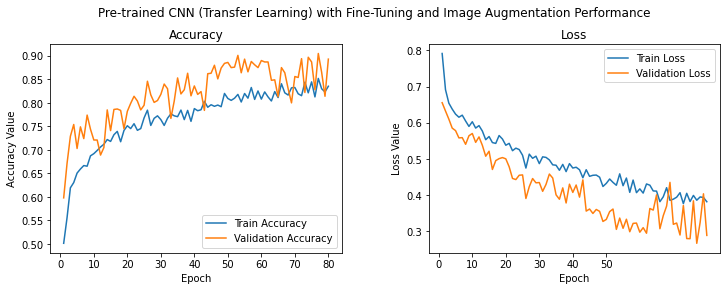

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Fine-Tuning and Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,81))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 81, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [10]:
model.save('cnn_transfer.h5')

In [ ]:
# sources: https://github.com/dipanjanS/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch05%20-%20Unleash%20the%20Power%20of%20Transfer%20Learning/CNN%20with%20Transfer%20Learning.ipynb; https://towardsdatascience.com/deep-learning-using-transfer-learning-python-code-for-resnet50-8acdfb3a2d38